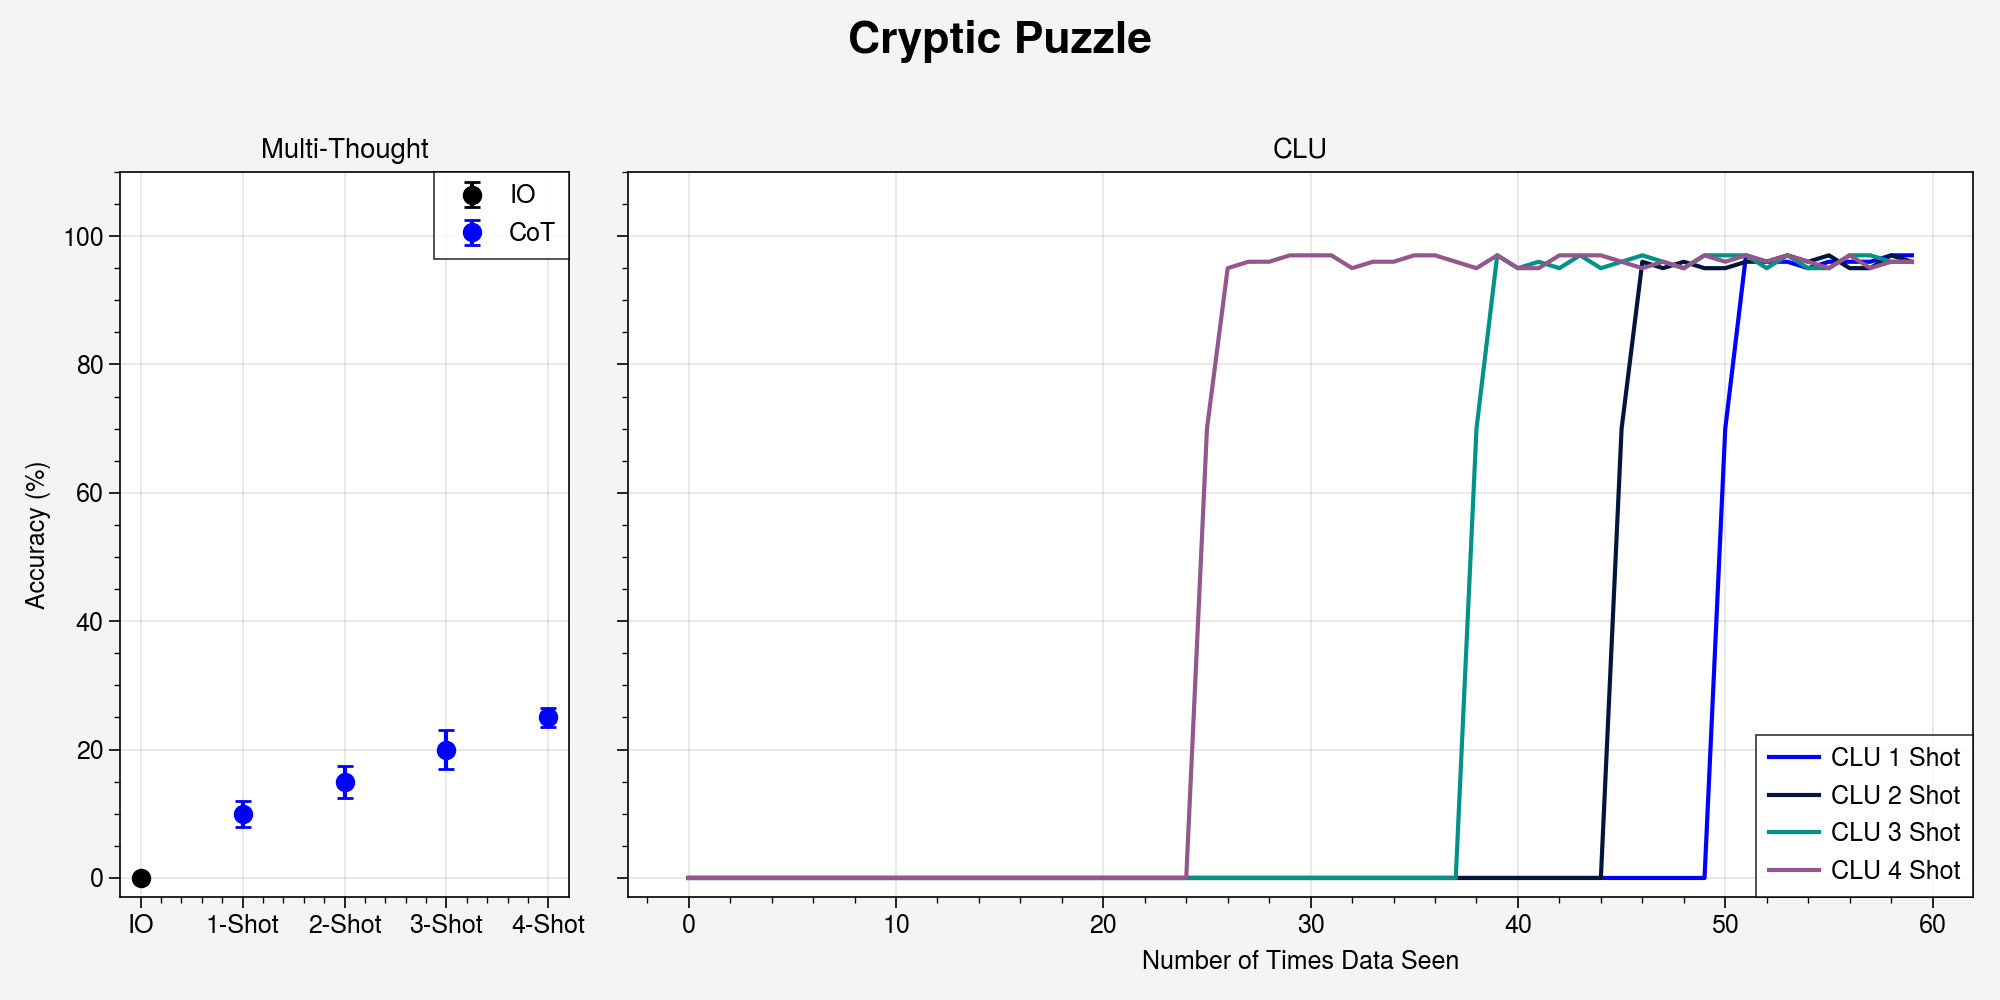

In [10]:
import numpy as np
import pandas as pd
import proplot as pplt
import matplotlib.pyplot as plt

# Step 1: Data Generation
# Defining common x-axis values
x_values_clu = np.arange(0, 60, 1)

# IO: Accuracy is 0 for all values
io_data = pd.DataFrame({'Data Seen': ['IO'], 'Accuracy': [0]})

# COT: Accuracy is constant at different levels for 0, 1, 2, and 4 shot
cot_accuracies = [10, 15, 20, 25]
cot_data = pd.DataFrame({'Shot': [1, 2, 3, 4], 'Accuracy': cot_accuracies})

# CLU: Multiple curves with different behaviors for increasing shots
def generate_clu_curve(starting_point, accuracy_at_start, stochasticity=5):
    curve = []
    for x in x_values_clu:
        if x < starting_point:
            curve.append(accuracy_at_start)
        elif x == starting_point:
            curve.append(70)
        else:
            curve.append(min(100, 95 + np.random.randint(0, stochasticity)))
    return curve

# Generating CLU curves for different shot scenarios
shots = [50, 45, 38, 25]
clu_data = pd.DataFrame({'Data Seen': x_values_clu})
for idx, shot in enumerate(shots):
    clu_data[f'CLU {idx+1} Shot'] = generate_clu_curve(shot, 0, 3)

# Step 2: Plotting with Matplotlib (Facet for IO, COT, and CLU)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 3]})

# Facet 1: IO and COT (separate x-axis for each)
# Plotting IO
axes[0].errorbar(
    io_data['Data Seen'].to_numpy(), 
    io_data['Accuracy'].to_numpy(), 
    yerr=0.1, 
    fmt='o', 
    color='black', 
    label='IO'
)
axes[0].set_title('IO')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim(-3, 110)

# Plotting COT (different shots with error bars)
cot_errors = [2, 2.5, 3, 1.5]  # Define error bars for COT shots
axes[0].errorbar(
    cot_data['Shot'].to_numpy(), 
    cot_data['Accuracy'].to_numpy(), 
    yerr=np.array(cot_errors), 
    fmt='o', 
    color='blue', 
    label='CoT'
)
axes[0].set_xticks([0] + list(cot_data['Shot']))
axes[0].set_xticklabels(['IO'] + [f'{int(s)}-Shot' for s in cot_data['Shot']])

axes[0].set_title('Multi-Thought')
axes[0].legend()

# Facet 2: CLU with multiple lines for different shots
clu_colors = ['blue', 'navy', 'teal', 'purple']
for idx, shot in enumerate(shots):
    axes[1].plot(
        clu_data['Data Seen'].to_numpy(), 
        clu_data[f'CLU {idx+1} Shot'].to_numpy(), 
        label=f'CLU {idx+1} Shot', 
        color=clu_colors[idx]
    )

axes[1].set_xlabel('Number of Times Data Seen')
axes[1].set_title('CLU')
axes[1].grid(True)
axes[1].legend(loc='lower right')

# Remove y-label for the right plot to avoid repetition
axes[1].set_ylabel('')
axes[1].set_yticklabels([])

# Global plot adjustments
axes[1].set_ylim(-3, 110)
fig.suptitle('Cryptic Puzzle', fontsize=16)

# Adjusting the spacing between subplots to bring them closer
plt.subplots_adjust(wspace=0.15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [11]:
import numpy as np
import pandas as pd
import proplot as pplt
import matplotlib.pyplot as plt
np.random.seed(38)

x_values_clu = np.arange(0, 100, 1)

# CLU: Multiple curves with different behaviors for increasing shots
def generate_clu_curve(starting_point, accuracy_at_start, stochasticity=5):
    curve = []
    for x in x_values_clu:
        if x < starting_point:
            curve.append(accuracy_at_start)
        elif x == starting_point:
            curve.append(70+np.random.randint(0, 5))
        elif x == int(starting_point+np.random.randint(0, 6)):
            curve.append(76+np.random.randint(0, 5))
        elif x == int(starting_point-np.random.randint(0, 6)):
            curve.append(34+np.random.randint(0, 5))
        else:
            curve.append(min(100, 100-stochasticity + np.random.randint(0, stochasticity)))
    return curve

# Generating CLU curves for different shot scenarios
shots = [86, 75, 58, 47,38]
clu_data = pd.DataFrame({'Data Seen': x_values_clu})
for idx, shot in enumerate(shots):
    clu_data[f'CLU {idx+1} Shot'] = generate_clu_curve(shot, 0, 5)


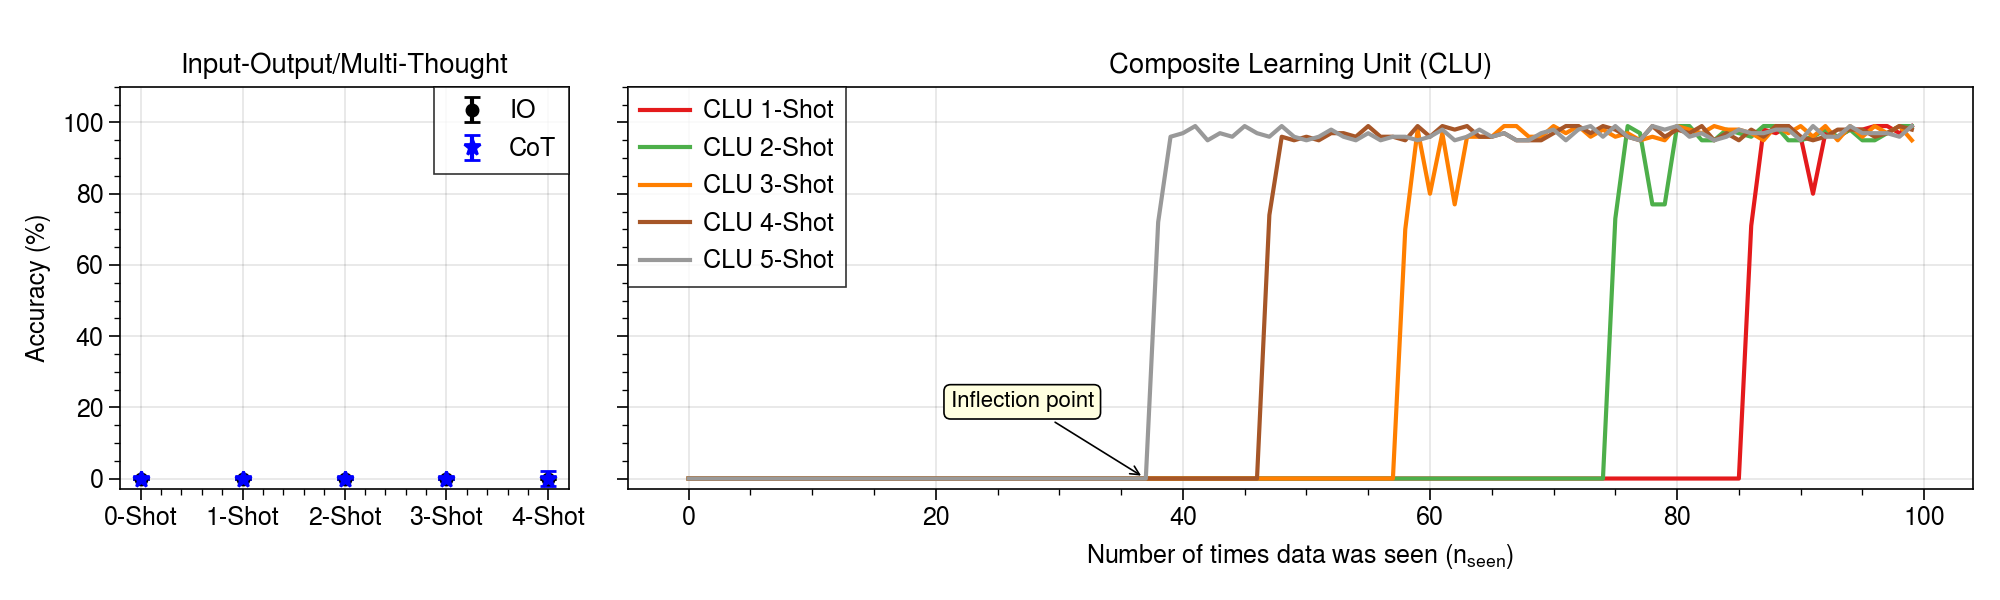

In [17]:
# Step 1: Data Generation
# Defining common x-axis values
x_values_clu = np.arange(0, 100, 1)

# IO: Accuracy is 0 for all values with additional shots
io_shots = [0, 1, 2, 3, 4]  # Original IO plus additional 1-shot to 4-shot
io_accuracies = [0, 0, 0, 0, 0]
io_data = pd.DataFrame({'Shot': io_shots, 'Accuracy': io_accuracies})

# COT: Accuracy is constant at different levels for 1, 2, 3, 4 shot
cot_accuracies = [0]*5  # Define constant accuracy for COT shots [0, 0, 0, 0, 0
cot_data = pd.DataFrame({'Shot': range(5), 'Accuracy': cot_accuracies})

# Step 2: Plotting with Matplotlib (Facet for IO, COT, and CLU)
fig, axes = plt.subplots(1, 2, figsize=(10, 3), gridspec_kw={'width_ratios': [1, 3]},facecolor='w')

# Facet 1: Multi-Thought - IO and COT (combined on the same x-axis)
# Plotting IO (with different shots)
io_errors = [0.0]*5  # Define small error bars for IO shots
axes[0].errorbar(
    io_data['Shot'].to_numpy(), 
    io_data['Accuracy'].to_numpy(), 
    yerr=np.array(io_errors), 
    fmt='o', 
    color='black', 
    label='IO',
    markersize=4
)

# Plotting COT (different shots with error bars)
cot_errors = [0,0,0,0,2]  # Define error bars for COT shots
axes[0].errorbar(
    cot_data['Shot'].to_numpy(), 
    cot_data['Accuracy'].to_numpy(), 
    yerr=np.array(cot_errors), 
    fmt='*', 
    color='blue', 
    label='CoT'
)

# Setting x-ticks and labels to include both IO and COT shots
# axes[0].set_xticks(io_data['Shot'].to_list() + cot_data['Shot'].to_list())
# axes[0].set_xticklabels(['IO', 'IO 1-Shot', 'IO 2-Shot', 'IO 3-Shot', 'IO 4-Shot', 'CoT 1-Shot', 'CoT 2-Shot', 'CoT 3-Shot', 'CoT 4-Shot'])
# Setting x-ticks and labels to include both IO and COT shots as generic "shots"
axes[0].set_xticks(io_data['Shot'].to_list())
axes[0].set_xticklabels(['0-Shot', '1-Shot', '2-Shot', '3-Shot', '4-Shot'])

# Plot title and legend
axes[0].set_title('Input-Output/Multi-Thought')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim(-3, 110)
axes[0].legend()

import matplotlib.cm as cm

# Facet 2: CLU with multiple lines for different shots using aesthetically pleasing colors
cmap = cm.get_cmap('Set1', len(shots))  # Using Set1 palette for distinct colors

for idx, shot in enumerate(shots):
    axes[1].plot(
        clu_data['Data Seen'].to_numpy(), 
        clu_data[f'CLU {idx+1} Shot'].to_numpy(), 
        label=f'CLU {idx+1}-Shot', 
        color=cmap(idx)  # Choosing color from the color map
    )

axes[1].set_xlabel('Number of times data was seen ($n_{seen}$)')
axes[1].set_title('Composite Learning Unit (CLU)')
axes[1].grid(True)
axes[1].legend(loc='best')

# Remove y-label for the right plot to avoid repetition
axes[1].set_ylabel('')
axes[1].set_yticklabels([])

# Global plot adjustments
axes[1].set_ylim(-3, 110)
# fig.suptitle('Cryptic Puzzle', fontsize=16)
# Define the x and y coordinates for the point you want to annotate
x_inflection = 37  # Example: x = 51 (number of times data seen)
y_inflection = 0  # Example: y = 70 (accuracy at the inflection point)

# Add the annotation with an arrow pointing to the inflection point
axes[1].annotate(
    'Inflection point',  # Annotation text
    xy=(x_inflection, y_inflection),  # Point to annotate
    xytext=(x_inflection - 10, y_inflection + 20),  # Position of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow properties
    fontsize=8,
    horizontalalignment='center',
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightyellow')  # Box properties
)

# Adjusting the spacing between subplots to bring them closer
plt.subplots_adjust(wspace=0.15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('cryptic_puzzle.png', dpi=300)
plt.show()


In [14]:
clu_data.to_csv('clu_acc.csv', index=False)